## Data Prep

In [1]:
import warnings
warnings.filterwarnings('ignore')
from pymatch.Matcher import Matcher

import pandas as pd 
import numpy as np

%matplotlib inline

In [25]:
path = "/Users/didi/Desktop/DS/AI提效实验/psm/psm_1.csv"
data = pd.read_csv(path)

In [26]:
#删除空列
data = data.drop(data.columns[len(data.columns)-1],axis=1)

In [27]:
data.head(6)

,order_id,duty,driver_id,product_id,city_id,normal_distance,a_birth_time,normal_time,gmv,is_anycar,...,sum_d_five_star,sum_d_becompliant,sum_d_compliant,sum_d_pic,first_uid,second_uid,apr_uid,diff_birth_time,diff_work_time,final_uid
0,17620643559079,1,580542336853600,1,5,4.9,2019/1/7 22:31,11,30.60,1,...,NaN,NaN,NaN,NaN,NaN,NaN,718578.0,7.060556,310.389896,718578
1,35192907117310,1,567950092429467,1,32,10.0,2018/12/30 19:44,16,36.90,0,...,NaN,NaN,NaN,NaN,NaN,NaN,718578.0,15.176887,619.436724,718578
2,35193099862041,1,565240820475684,1,32,19.4,2019/1/6 13:04,22,52.20,0,...,NaN,NaN,NaN,NaN,NaN,NaN,721982.0,8.454294,990.127465,721982
3,17620715716630,1,563764298653697,1,5,3.7,2019/1/8 20:51,6,25.60,0,...,NaN,NaN,NaN,NaN,NaN,NaN,722000.0,6.129942,1284.322465,722000
4,35193176793585,1,566168547569017,1,6,13.2,2019/1/9 15:23,24,43.84,0,...,NaN,NaN,NaN,NaN,NaN,NaN,722008.0,5.358218,857.540509,722008
5,35193037973343,1,564319227220762,1,21,6.9,2019/1/3 22:06,10,27.56,0,...,NaN,NaN,NaN,NaN,NaN,NaN,722010.0,11.078160,1186.621181,722010


In [28]:
#删除无用列
data = data.drop(columns=['a_birth_time','work_time','first_uid','second_uid','apr_uid','sum_d_pic','biz_status','is_anycar','sp_flag'])

In [29]:
#检查类型
data.dtypes

order_id               int64
duty                   int64
driver_id              int64
product_id             int64
city_id                int64
normal_distance      float64
normal_time            int64
gmv                  float64
team_id                int64
is_valid               int64
driver_grade           int64
sum_d_five_star      float64
sum_d_becompliant    float64
sum_d_compliant      float64
diff_birth_time      float64
diff_work_time       float64
final_uid              int64
dtype: object

In [30]:
data.product_id.value_counts()

3     5286
1      195
7       18
4       17
20       7
26       1
Name: product_id, dtype: int64

In [31]:
#cast to catagorical data

data.product_id = data.product_id.astype('category')
data.team_id = data.team_id.astype('category')
data.city_id = data.city_id.astype('category')
data.is_valid = data.is_valid.astype('category')

In [32]:
#再次检查类型
data.dtypes

order_id                int64
duty                    int64
driver_id               int64
product_id           category
city_id              category
normal_distance       float64
normal_time             int64
gmv                   float64
team_id              category
is_valid             category
driver_grade            int64
sum_d_five_star       float64
sum_d_becompliant     float64
sum_d_compliant       float64
diff_birth_time       float64
diff_work_time        float64
final_uid               int64
dtype: object

In [33]:
data.head(6)

,order_id,duty,driver_id,product_id,city_id,normal_distance,normal_time,gmv,team_id,is_valid,driver_grade,sum_d_five_star,sum_d_becompliant,sum_d_compliant,diff_birth_time,diff_work_time,final_uid
0,17620643559079,1,580542336853600,1,5,4.9,11,30.60,1,0,5,NaN,NaN,NaN,7.060556,310.389896,718578
1,35192907117310,1,567950092429467,1,32,10.0,16,36.90,3,1,5,NaN,NaN,NaN,15.176887,619.436724,718578
2,35193099862041,1,565240820475684,1,32,19.4,22,52.20,1,1,5,NaN,NaN,NaN,8.454294,990.127465,721982
3,17620715716630,1,563764298653697,1,5,3.7,6,25.60,3,1,5,NaN,NaN,NaN,6.129942,1284.322465,722000
4,35193176793585,1,566168547569017,1,6,13.2,24,43.84,7,1,5,NaN,NaN,NaN,5.358218,857.540509,722008
5,35193037973343,1,564319227220762,1,21,6.9,10,27.56,3,1,5,NaN,NaN,NaN,11.078160,1186.621181,722010


## Propensity Score Matching

In [34]:
#客服判定有责订单为实验组
#客服判定无责订单为对照组

test = data[data.duty == 1]
control = data[data.duty == 0]

### Matcher

In [35]:
#Matcher 输出逻辑回归结果
m = Matcher(test, control, yvar="duty",exclude=["order_id","driver_id"])

Formula:
duty ~ product_id+city_id+normal_distance+normal_time+gmv+team_id+is_valid+driver_grade+sum_d_five_star+sum_d_becompliant+sum_d_compliant+diff_birth_time+diff_work_time+final_uid
n majority: 4974
n minority: 509


In [36]:
test.head(6)

,order_id,duty,driver_id,product_id,city_id,normal_distance,normal_time,gmv,team_id,is_valid,driver_grade,sum_d_five_star,sum_d_becompliant,sum_d_compliant,diff_birth_time,diff_work_time,final_uid
0,17620643559079,1,580542336853600,1,5,4.9,11,30.60,1,0,5,NaN,NaN,NaN,7.060556,310.389896,718578
1,35192907117310,1,567950092429467,1,32,10.0,16,36.90,3,1,5,NaN,NaN,NaN,15.176887,619.436724,718578
2,35193099862041,1,565240820475684,1,32,19.4,22,52.20,1,1,5,NaN,NaN,NaN,8.454294,990.127465,721982
3,17620715716630,1,563764298653697,1,5,3.7,6,25.60,3,1,5,NaN,NaN,NaN,6.129942,1284.322465,722000
4,35193176793585,1,566168547569017,1,6,13.2,24,43.84,7,1,5,NaN,NaN,NaN,5.358218,857.540509,722008
5,35193037973343,1,564319227220762,1,21,6.9,10,27.56,3,1,5,NaN,NaN,NaN,11.078160,1186.621181,722010


In [37]:
#for reproducibility
#nmodels 取决于两个组imbalance的程度
#estimate Propensity Scoere by Logistic Regression

np.random.seed(20190101)

m.fit_scores(balance=True, nmodels=100)


Fitting Models on Balanced Samples: 100\100
Average Accuracy: 61.3%


### Predict Scores

In [38]:
m.predict_scores()

/Users/didi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/didi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


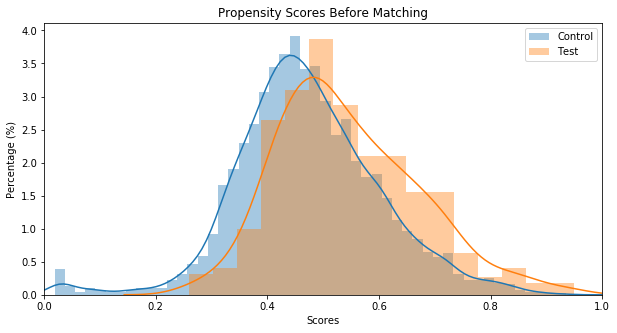

In [39]:
m.plot_scores()

上图显示了数据的离散程度，可看出<font color='blue'> **实验组的Propensity倾向性得分更高**<font color='black'>，即在给定现有特征的情况下，实验组有责概率更大。

### Tune Threshold

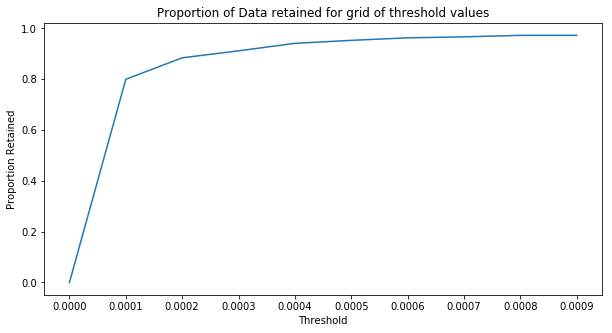

In [46]:
m.tune_threshold(method='random')

- matches are found from the majority group for the minority group. If a record in the minority group has no suitable matches, it is dropped from the final matched dataset. We need to ensure our threshold is small enough such that we get close matches and retain most (or all) of our data in the minority group.

- method="random"将匹配在threshold内的任意记录，而另一种方法min只会找到离minority group最近的记录。
- threshold 0.0004 will contain more than 90%of our data

### Match Data

In [47]:
#匹配 test 和 control record
m.match(method="min", nmatches=1, threshold=0.0007)
m.record_frequency()

,freq,n_records
0,1,922
1,2,38
2,3,5
3,5,1


Matching is done with replacement, meaning a single majority record can be matched to multiple minority records.

In [48]:
#generate weight vector
m.assign_weight_vector()

In [49]:
#get the matched data
df_mach = m.matched_data.sort_values("match_id")

### Assess Matches

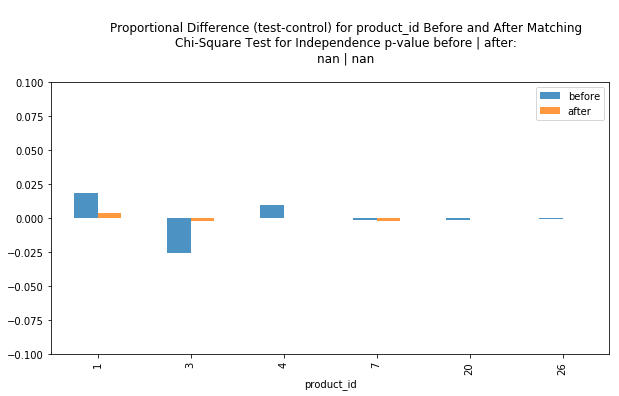

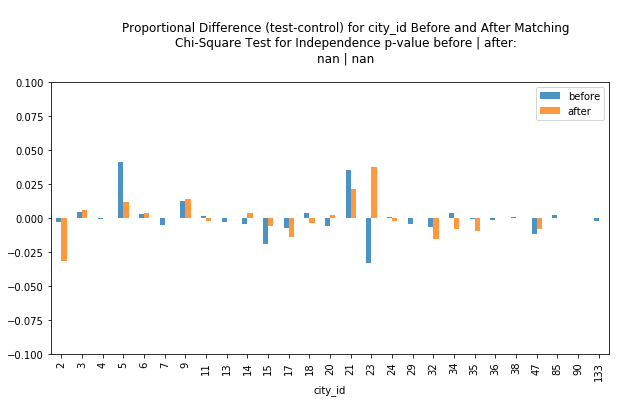

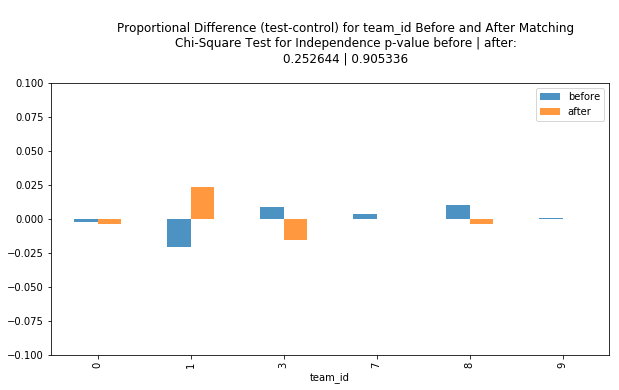

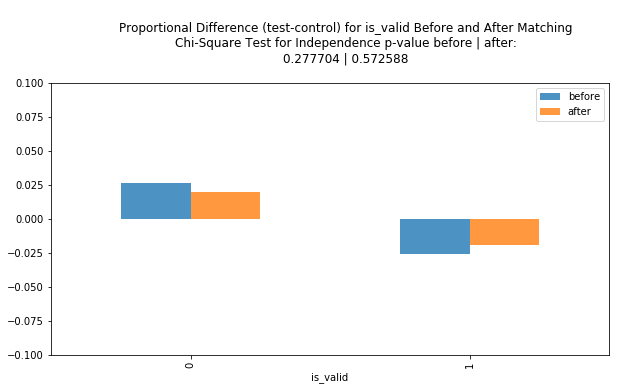

In [50]:
#catagorical objects
catagorical_results = m.compare_categorical(return_table=True)

In [51]:
catagorical_results

,var,before,after
0,product_id,NaN,NaN
1,city_id,NaN,NaN
2,team_id,0.252644,0.905336
3,is_valid,0.277704,0.572588


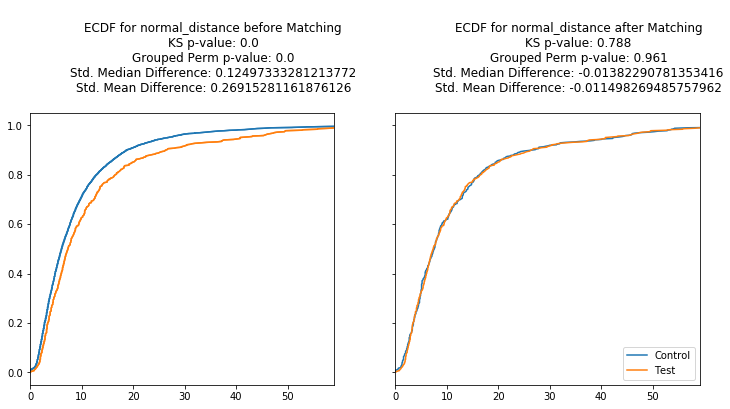

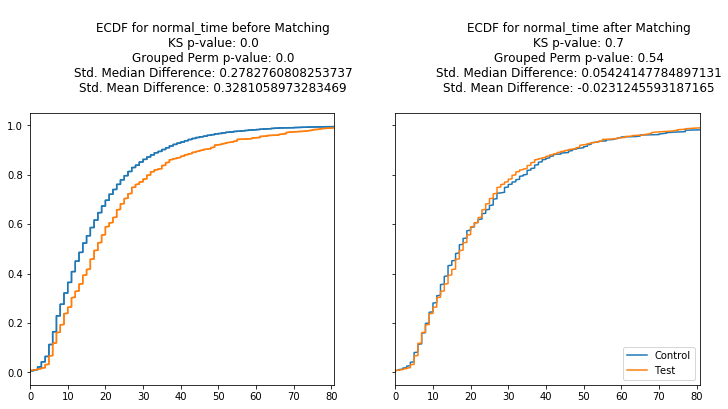

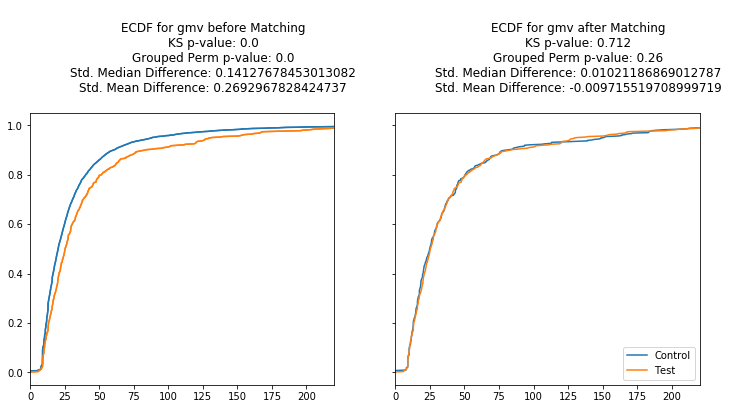

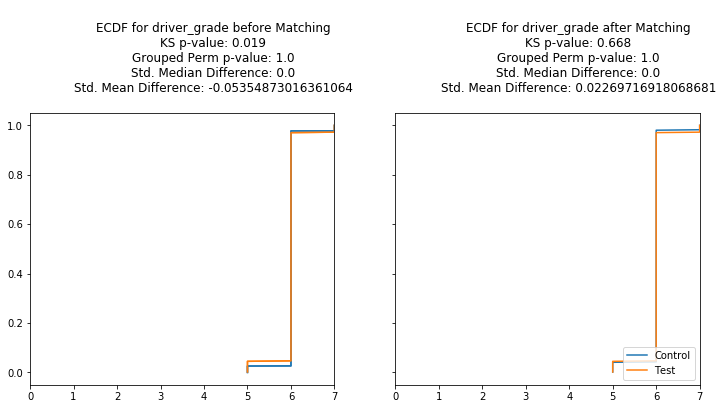

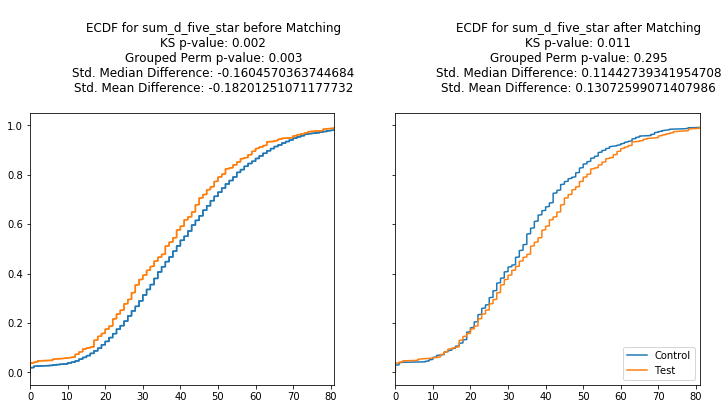

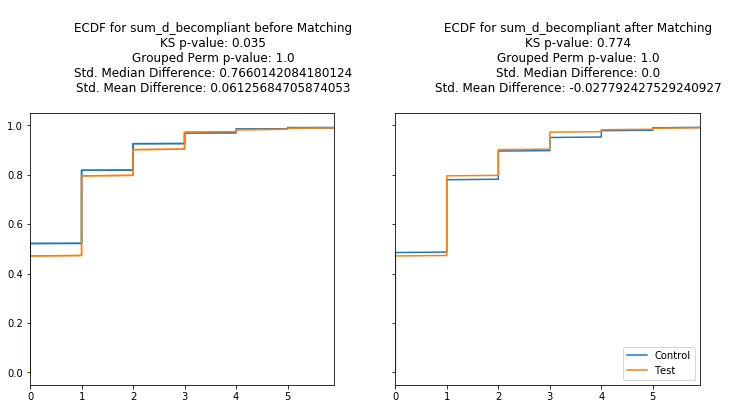

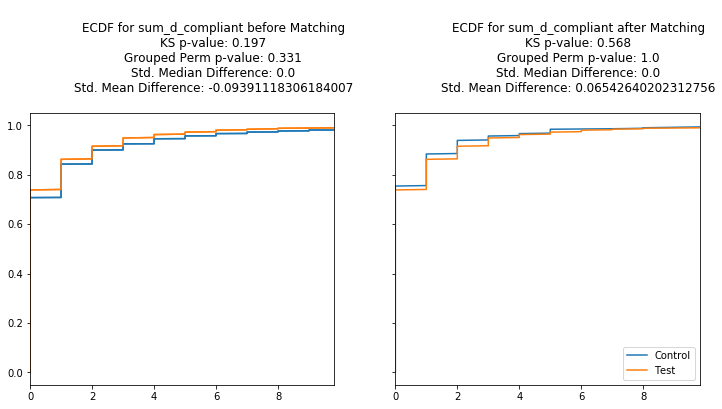

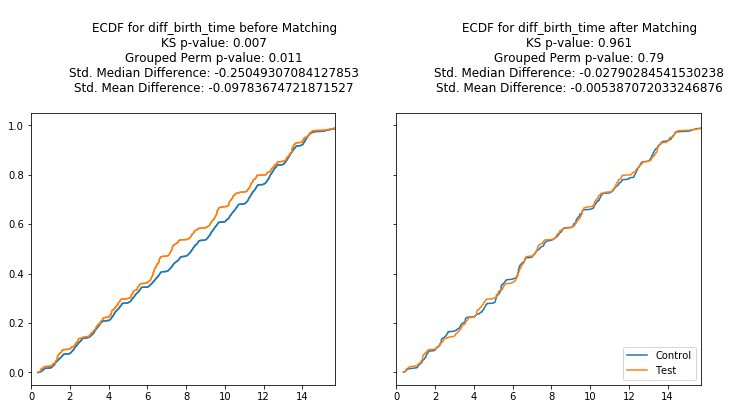

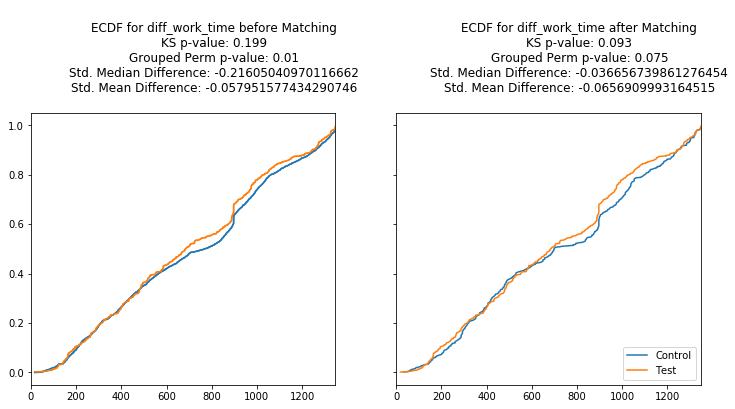

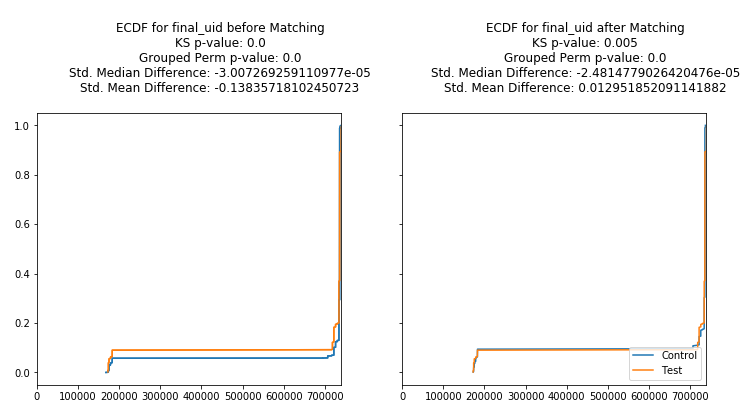

In [52]:
#continuous objects
cc = m.compare_continuous(return_table=True)

In [24]:
cc

,var,ks_before,ks_after,grouped_chisqr_before,grouped_chisqr_after,std_median_diff_before,std_median_diff_after,std_mean_diff_before,std_mean_diff_after
0,normal_distance,0.000,0.014,0.000,0.000,0.124973,-0.057091,0.269153,-0.082759
1,normal_time,0.000,0.057,0.000,0.000,0.278276,-0.052088,0.328106,-0.155037
2,gmv,0.000,0.021,0.000,0.000,0.141277,-0.078649,0.269297,-0.033721
3,driver_grade,0.024,0.002,1.000,1.000,0.000000,0.000000,-0.053549,0.210421
4,sum_d_five_star,0.000,0.000,0.003,0.000,-0.160457,0.263634,-0.182013,0.171233
5,sum_d_becompliant,0.032,0.022,1.000,1.000,0.766014,0.888643,0.061257,0.160619
6,sum_d_compliant,0.185,0.108,0.317,1.000,0.000000,0.000000,-0.093911,0.144943
7,diff_birth_time,0.010,0.071,0.008,0.371,-0.250493,0.027796,-0.097837,0.079568
8,diff_work_time,0.219,0.000,0.005,0.000,-0.216050,0.471337,-0.057952,0.223093


## 后续

有一部分投诉订单由无法匹配司机评分表，所以没有得到Propensity Score，以下步骤为将此部分订单捞出，删除是na的feature后重新进行匹配。

In [455]:
df_match.shape

(1018, 21)

In [456]:
df_match_noduty = mm[mm.duty == 0]
df_match_noduty.duty.count()

509

In [457]:
df_match_noduty.to_csv('wuze_nonull.csv')

mm

In [458]:
m1 = df_match[df_match.duty ==1]

In [459]:
outer = m1.append(test)

In [460]:
#抓取司机评分表没有匹配的订单，即没有被psm算法包括的订单
outer.drop_duplicates(subset='order_id',keep=False, inplace=False)


,city_id,diff_birth_time,diff_work_time,driver_grade,driver_id,duty,final_uid,gmv,is_valid,match_id,...,normal_time,order_id,product_id,record_id,scores,sum_d_becompliant,sum_d_compliant,sum_d_five_star,team_id,weight
0,5,7.060556,310.389896,5,580542336853600,1,718578,30.60,0,NaN,...,11,17620643559079,1,NaN,NaN,NaN,NaN,NaN,1,NaN
1,32,15.176887,619.436724,5,567950092429467,1,718578,36.90,1,NaN,...,16,35192907117310,1,NaN,NaN,NaN,NaN,NaN,3,NaN
2,32,8.454294,990.127465,5,565240820475684,1,721982,52.20,1,NaN,...,22,35193099862041,1,NaN,NaN,NaN,NaN,NaN,1,NaN
3,5,6.129942,1284.322465,5,563764298653697,1,722000,25.60,1,NaN,...,6,17620715716630,1,NaN,NaN,NaN,NaN,NaN,3,NaN
4,6,5.358218,857.540509,5,566168547569017,1,722008,43.84,1,NaN,...,24,35193176793585,1,NaN,NaN,NaN,NaN,NaN,7,NaN
5,21,11.078160,1186.621181,5,564319227220762,1,722010,27.56,1,NaN,...,10,35193037973343,1,NaN,NaN,NaN,NaN,NaN,3,NaN


In [461]:
d2 = data.dropna(axis=0, how='any')

In [462]:
#将这部分因未匹配司机评分表而没有PSM匹配的订单重新捞出进行匹配

path = "/Users/didi/Desktop/DS/AI提效实验/psm/psm_1.csv"

data2 = pd.read_csv(path)
data2 = data2.drop(data2.columns[len(data2.columns)-1],axis=1)

In [463]:
data2 = data2.drop(columns=['a_birth_time','work_time','first_uid','second_uid','apr_uid','sum_d_pic','biz_status','sp_flag','is_anycar'])

In [464]:
df2 = data2[data2.T.isnull().any()]

df2.shape

(41, 17)

In [465]:
df2 = df2.drop(columns=['sum_d_five_star','sum_d_becompliant','sum_d_compliant'])

In [466]:
test = df2[df2.duty == 1]
control = df2[df2.duty == 0]


In [467]:
m = Matcher(test, control, yvar="duty",exclude=["order_id","team_id","final_uid","driver_id","driver_grade","product_id","is_valid","city_id"])

Formula:
duty ~ normal_distance+normal_time+gmv+diff_birth_time+diff_work_time
n majority: 35
n minority: 6


In [468]:
df2.head(5)

,order_id,duty,driver_id,product_id,city_id,normal_distance,normal_time,gmv,team_id,is_valid,driver_grade,diff_birth_time,diff_work_time,final_uid
0,17620643559079,1,580542336853600,1,5,4.9,11,30.60,1,0,5,7.060556,310.389896,718578
1,35192907117310,1,567950092429467,1,32,10.0,16,36.90,3,1,5,15.176887,619.436724,718578
2,35193099862041,1,565240820475684,1,32,19.4,22,52.20,1,1,5,8.454294,990.127465,721982
3,17620715716630,1,563764298653697,1,5,3.7,6,25.60,3,1,5,6.129942,1284.322465,722000
4,35193176793585,1,566168547569017,1,6,13.2,24,43.84,7,1,5,5.358218,857.540509,722008


In [469]:
# for reproducibility
np.random.seed(20190101)

m.fit_scores(balance=True, nmodels=5)

Fitting Models on Balanced Samples: 1\5Error: Perfect separation detected, results not available
Fitting Models on Balanced Samples: 1\5Error: Perfect separation detected, results not available
Fitting Models on Balanced Samples: 5\5
Average Accuracy: 75.0%


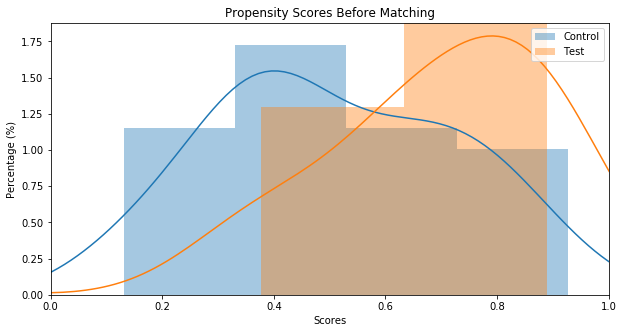

In [470]:
m.predict_scores()
m.plot_scores()

In [471]:
m.match(method="min", nmatches=1, threshold=0.0008)
m.record_frequency()

,freq,n_records
0,1,12


In [472]:
#generate weight vector
m.assign_weight_vector()

In [473]:
m2 = m.matched_data.sort_values("match_id")

In [474]:
m2.shape

(12, 18)

In [475]:
m2

,record_id,weight,order_id,duty,driver_id,product_id,city_id,normal_distance,normal_time,gmv,team_id,is_valid,driver_grade,diff_birth_time,diff_work_time,final_uid,scores,match_id
0,0,1.0,17620643559079,1,580542336853600,1,5,4.9,11,30.60,1,0,5,7.060556,310.389896,718578,0.376879,0
7,11,1.0,17620402570501,0,563812594417666,1,2,3.2,11,26.52,3,1,5,10.116956,1276.301493,707060,0.377584,0
1,1,1.0,35192907117310,1,567950092429467,1,32,10.0,16,36.90,3,1,5,15.176887,619.436724,718578,0.874430,1
9,16,1.0,35192913838659,0,565200022143269,1,6,14.4,25,60.08,1,1,5,14.988426,1022.221505,707060,0.846116,1
2,2,1.0,35193099862041,1,565240820475684,1,32,19.4,22,52.20,1,1,5,8.454294,990.127465,721982,0.890351,2
10,22,1.0,17619891764487,0,565144828845254,1,23,20.8,35,71.28,1,0,5,15.521655,1001.438727,721982,0.926673,2
3,3,1.0,17620715716630,1,563764298653697,1,5,3.7,6,25.60,3,1,5,6.129942,1284.322465,722000,0.597115,3
8,14,1.0,17620948710645,0,567950025192381,1,23,92.9,94,353.26,3,1,5,3.257998,601.569317,707060,0.609112,3
4,4,1.0,35193176793585,1,566168547569017,1,6,13.2,24,43.84,7,1,5,5.358218,857.540509,722008,0.667039,4
11,37,1.0,35193003983938,0,580542417173360,1,18,7.4,9,27.04,1,0,5,12.343125,260.368287,726156,0.690109,4


In [476]:
m22 = m2[m2.duty ==0]

In [477]:
m22

,record_id,weight,order_id,duty,driver_id,product_id,city_id,normal_distance,normal_time,gmv,team_id,is_valid,driver_grade,diff_birth_time,diff_work_time,final_uid,scores,match_id
7,11,1.0,17620402570501,0,563812594417666,1,2,3.2,11,26.52,3,1,5,10.116956,1276.301493,707060,0.377584,0
9,16,1.0,35192913838659,0,565200022143269,1,6,14.4,25,60.08,1,1,5,14.988426,1022.221505,707060,0.846116,1
10,22,1.0,17619891764487,0,565144828845254,1,23,20.8,35,71.28,1,0,5,15.521655,1001.438727,721982,0.926673,2
8,14,1.0,17620948710645,0,567950025192381,1,23,92.9,94,353.26,3,1,5,3.257998,601.569317,707060,0.609112,3
11,37,1.0,35193003983938,0,580542417173360,1,18,7.4,9,27.04,1,0,5,12.343125,260.368287,726156,0.690109,4
6,8,1.0,17620302926635,0,564279756066816,1,23,9.6,16,36.16,3,1,5,11.265625,1193.304641,707060,0.792945,5


In [478]:
m22.to_csv('wuze_null.csv')

In [479]:
#因psm算法无法进行去重匹配，因此有20个无责订单被重复匹配了
#此处取出之前没有被PSM算法匹配过的20个无责订单

data_noduty = data[data.duty ==0]

In [480]:
psm_wuze = data_noduty.append(m22)

In [481]:
d4 = psm_wuze.drop_duplicates(subset='order_id',keep=False, inplace=False)

In [482]:
d4.to_csv('other_wuze.csv')